In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import preprocessing
from re import sub
from decimal import Decimal
import datetime

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("data_ce.csv") 
data.head()

,Unnamed: 0,description,neighborhood_overview,host_name,host_about,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_derived,calendar_last_scraped_derived,first_review_derived,last_review_derived,host_location_derived,distancefromberlin
0,0,1,1,1,1,1,1,1,1,1,...,0,1,0,1.99,4461.573215,92.573215,4274.573215,301.573217,1,573.58
1,1,1,1,1,1,0,1,1,2,2,...,1,2,0,2.65,4027.573215,93.573215,3937.573215,246.573217,1,576.82
2,2,1,0,1,1,1,1,1,2,2,...,1,0,0,0.16,4039.573215,93.573215,1055.573215,306.573217,0,577.43
3,3,1,1,1,1,1,1,1,1,1,...,0,1,0,2.07,3916.573215,92.573215,3259.573215,139.573217,1,576.72
4,4,1,1,1,1,1,1,1,2,2,...,0,2,0,2.73,3865.573215,92.573215,3764.573215,117.573217,1,576.98


In [4]:
data.head()
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
names_index=[ 'host_since_derived', 'host_location_derived', 
        'host_is_superhost',
       'host_listings_count', 
        
        'host_has_profile_pic', 
    'host_identity_verified',
       'distancefromberlin',
       
    'accommodates', 
            
        'bedrooms', 'beds',
    'minimum_nights' ,
    'has_availability',
       
       'calendar_last_scraped_derived', 
       'number_of_reviews',
       
        'review_scores_rating', 
       'review_scores_accuracy',
       'review_scores_cleanliness', 
       
    'reviews_per_month', 'price']
target= ['price']
x = data[names_index]
df = pd.DataFrame(data, columns=names_index) 
y = data[target]
#print(df)

In [6]:
df = data[['host_since_derived', 'host_location_derived', 
        'host_is_superhost',
       'host_listings_count', 
        
        'host_has_profile_pic', 
    'host_identity_verified',
       'distancefromberlin',
       
    'accommodates', 
            
        'bedrooms', 'beds',
    'minimum_nights' ,
    'has_availability',
       
       'calendar_last_scraped_derived', 
       'number_of_reviews',
       
        'review_scores_rating', 
       'review_scores_accuracy',
       'review_scores_cleanliness', 
       
    'reviews_per_month', 'price']].copy()

In [7]:
df = data[names_index]
df['Deal'] = data['price']/ data ['review_scores_rating']
print(df['Deal'])
df.describe()

C:\Users\manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        0.602041
1        2.426966
2        1.250000
3        1.424242
4        0.773196
           ...   
16346    0.620000
16347    0.760000
16348    0.666667
16349    1.560000
16350    1.700000
Name: Deal, Length: 16351, dtype: float64


,host_since_derived,host_location_derived,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,distancefromberlin,accommodates,bedrooms,beds,minimum_nights,has_availability,calendar_last_scraped_derived,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,reviews_per_month,price,Deal
count,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.0,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000,16351.000000
mean,2088.854727,0.843312,0.170693,2.752737,0.996942,0.667054,577.095449,2.843496,1.498379,1.764418,3.410801,0.0,93.273478,28.673904,95.137300,9.694308,9.465883,0.732117,166.723704,1.764070
std,748.441738,0.363517,0.376252,12.516366,0.055216,0.471282,2.392947,1.257941,0.859475,1.426369,14.385474,0.0,0.458290,57.455151,6.874483,0.719245,0.892518,1.276702,523.825964,5.516398
min,99.573215,0.000000,0.000000,0.000000,0.000000,0.000000,567.290000,1.000000,1.000000,0.000000,1.000000,0.0,91.573215,1.000000,20.000000,2.000000,2.000000,0.010000,5.000000,0.051546
25%,1635.573215,1.000000,0.000000,1.000000,1.000000,0.000000,575.760000,2.000000,1.000000,1.000000,2.000000,0.0,92.573215,4.000000,93.000000,10.000000,9.000000,0.160000,95.000000,1.000000
50%,2152.573215,1.000000,0.000000,1.000000,1.000000,1.000000,577.270000,2.000000,1.000000,1.000000,2.000000,0.0,93.573215,11.000000,97.000000,10.000000,10.000000,0.350000,130.000000,1.358696
75%,2648.573215,1.000000,0.000000,1.000000,1.000000,1.000000,578.840000,4.000000,2.000000,2.000000,3.000000,0.0,93.573215,27.000000,100.000000,10.000000,10.000000,0.720000,180.000000,1.917526
max,4461.573215,1.000000,1.000000,611.000000,1.000000,1.000000,586.200000,16.000000,30.000000,32.000000,1001.000000,0.0,93.573215,854.000000,100.000000,10.000000,10.000000,44.830000,20737.000000,227.879121


In [8]:
#print(df)
#print(df['Deal'].max())
#print(df['Deal'].min())
# pd.set_option('display.max_rows', df.shape[0]+1)
#print(df.Deal.value_counts())

interval = (df['Deal'].max()-df['Deal'].min())/3
print(interval)

#df.to_csv ('DF.csv', index = False, header=True)
print(df.Deal.isnull().sum())

75.94252482912277
0


In [9]:
def classify_deal(row):
    if row['Deal'] < 1.5:
        return "good deal"
    elif row['Deal'] > 1.5 and row['Deal'] < 4.5:
        return "average deal"
    else:
        return "poor deal"

df['deal_type'] = df.apply(classify_deal, axis=1)

# for i in range (len(df)):
#     print(i)
#     if (df.loc[i, 'Deal']<1.5):
#         df.iloc[i, 'deal'] = "good deal"
#         print(df.loc[i, 'Deal'])
#         print(df.loc[i, 'deal'])
#     elif (df.loc[i, 'Deal']>1.5) & (df.loc[i, 'Deal']<4.5):
#         df.iloc[i, 'deal'] = "average deal"
#         print(df.loc[i, 'Deal'])
#         print(df.loc[i, 'deal'])
#     elif (df.loc[i, 'Deal']>4.5):
#         df.iloc[i, 'deal'] = "poor deal"
#         print(df.loc[i, 'Deal'])
#         print(df.loc[i, 'deal'])

C:\Users\manju\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [10]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
features = ['host_since_derived', 'host_location_derived', 
        'host_is_superhost',
       'host_listings_count', 
        
        'host_has_profile_pic', 
    'host_identity_verified',
       'distancefromberlin',
       
    'accommodates', 
            
        'bedrooms', 'beds',
    'minimum_nights' ,
    'has_availability',
       
       'calendar_last_scraped_derived', 
       'number_of_reviews',
       
        'review_scores_rating', 
       'review_scores_accuracy',
       'review_scores_cleanliness', 
       
    'reviews_per_month', 'price']

X = data.loc[:, features].values
# Separating out the target
y = df.loc[:,['deal_type']].values
# Standardizing the features
x = StandardScaler().fit_transform(X)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
#print(principalComponents)

In [12]:
finalDf = pd.concat([principalDf, df], axis = 1)
print(finalDf)


       principal component 1  principal component 2  host_since_derived  \
0                  -2.780018               2.235801         4461.573215   
1                  -2.536168               0.710664         4027.573215   
2                  -1.024685               0.491679         4039.573215   
3                  -2.958631               1.718430         3916.573215   
4                  -3.470251               1.894454         3865.573215   
...                      ...                    ...                 ...   
16346              -1.113142              -0.132656          108.573215   
16347              14.521182              10.397274          108.573215   
16348              -0.181475              -1.789854          108.573215   
16349               2.907993               2.660070         1086.573215   
16350               0.675857               0.386854           99.573215   

       host_location_derived  host_is_superhost  host_listings_count  \
0                          

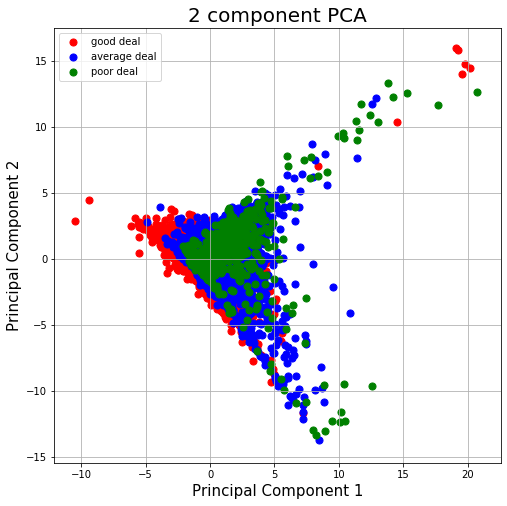

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['good deal', 'average deal', 'poor deal']
colors = ['r', 'b', 'g']
for y, color in zip(targets,colors):
    indicesToKeep = finalDf['deal_type'] == y
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
targetLegend = ["good deal", "average deal", "poor deal"]
ax.legend(targetLegend)
ax.grid()


In [14]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 3)
y_kmean = kmean.fit_predict(principalDf)
print(y_kmean)

[0 0 0 ... 2 1 1]


In [15]:
finalDf.head(10)

,principal component 1,principal component 2,host_since_derived,host_location_derived,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,distancefromberlin,accommodates,...,has_availability,calendar_last_scraped_derived,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,reviews_per_month,price,Deal,deal_type
0,-2.780018,2.235801,4461.573215,1,1,1,1,1,573.58,2,...,0,92.573215,278,98,10.0,10.0,1.99,59.0,0.602041,good deal
1,-2.536168,0.710664,4027.573215,1,0,2,1,1,576.82,2,...,0,93.573215,340,89,10.0,10.0,2.65,216.0,2.426966,average deal
2,-1.024685,0.491679,4039.573215,0,1,2,1,0,577.43,3,...,0,93.573215,5,100,10.0,10.0,0.16,125.0,1.250000,good deal
3,-2.958631,1.718430,3916.573215,1,1,1,1,1,576.72,2,...,0,92.573215,219,99,10.0,10.0,2.07,141.0,1.424242,good deal
4,-3.470251,1.894454,3865.573215,1,1,2,1,1,576.98,2,...,0,92.573215,334,97,10.0,10.0,2.73,75.0,0.773196,good deal
5,-4.593470,1.969316,3865.573215,1,1,2,1,1,576.93,1,...,0,92.573215,481,95,10.0,10.0,4.16,55.0,0.578947,good deal
6,1.466975,1.580657,3851.573215,1,0,1,1,1,580.02,4,...,0,92.573215,32,95,9.0,10.0,0.29,219.0,2.305263,average deal
7,-1.664578,1.093293,3794.573215,1,1,1,1,1,577.39,3,...,0,93.573215,89,96,10.0,10.0,0.75,160.0,1.666667,average deal
8,0.701437,1.654787,3785.573215,1,0,0,1,1,577.01,4,...,0,91.573215,60,98,10.0,7.0,5.54,211.0,2.153061,average deal
9,1.400886,-2.912777,4007.573215,1,0,1,1,0,579.08,2,...,0,92.573215,61,80,8.0,7.0,0.51,79.0,0.987500,good deal


In [16]:
finalDf['K-mean'] = y_kmean
finalDf.drop(['Deal', 'deal_type'], axis=1, inplace = True)

    

In [17]:
for idx, row in finalDf.iterrows():
    if (finalDf.loc[idx, 'K-mean'] == 0):
        finalDf.loc[idx, 'Target'] = "good deal"
    elif (finalDf.loc[idx, 'K-mean'] == 1):
        finalDf.loc[idx, 'Target'] = "average deal"
    else:
        finalDf.loc[idx,'Target'] = "poor deal"

In [18]:
finalDf.head(10)

,principal component 1,principal component 2,host_since_derived,host_location_derived,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,distancefromberlin,accommodates,...,has_availability,calendar_last_scraped_derived,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,reviews_per_month,price,K-mean,Target
0,-2.780018,2.235801,4461.573215,1,1,1,1,1,573.58,2,...,0,92.573215,278,98,10.0,10.0,1.99,59.0,0,good deal
1,-2.536168,0.710664,4027.573215,1,0,2,1,1,576.82,2,...,0,93.573215,340,89,10.0,10.0,2.65,216.0,0,good deal
2,-1.024685,0.491679,4039.573215,0,1,2,1,0,577.43,3,...,0,93.573215,5,100,10.0,10.0,0.16,125.0,0,good deal
3,-2.958631,1.718430,3916.573215,1,1,1,1,1,576.72,2,...,0,92.573215,219,99,10.0,10.0,2.07,141.0,0,good deal
4,-3.470251,1.894454,3865.573215,1,1,2,1,1,576.98,2,...,0,92.573215,334,97,10.0,10.0,2.73,75.0,0,good deal
5,-4.593470,1.969316,3865.573215,1,1,2,1,1,576.93,1,...,0,92.573215,481,95,10.0,10.0,4.16,55.0,0,good deal
6,1.466975,1.580657,3851.573215,1,0,1,1,1,580.02,4,...,0,92.573215,32,95,9.0,10.0,0.29,219.0,1,average deal
7,-1.664578,1.093293,3794.573215,1,1,1,1,1,577.39,3,...,0,93.573215,89,96,10.0,10.0,0.75,160.0,0,good deal
8,0.701437,1.654787,3785.573215,1,0,0,1,1,577.01,4,...,0,91.573215,60,98,10.0,7.0,5.54,211.0,1,average deal
9,1.400886,-2.912777,4007.573215,1,0,1,1,0,579.08,2,...,0,92.573215,61,80,8.0,7.0,0.51,79.0,2,poor deal


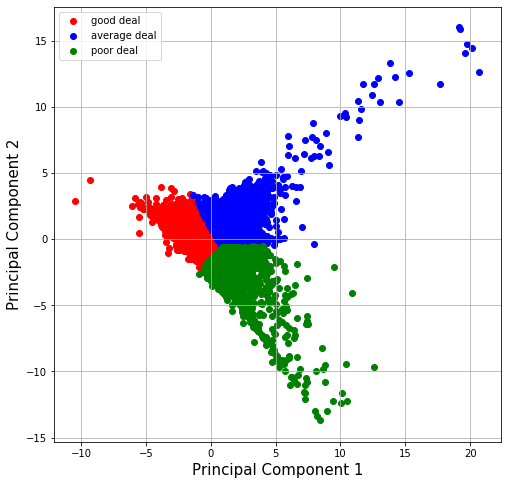

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
targets = ["good deal", "average deal", "poor deal"]
colors = ['r', 'b', 'g']
for y, color in zip(targets,colors):
    #print(y)
    indicesToKeep = finalDf['Target'] == y
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'], finalDf.loc[indicesToKeep,'principal component 2'],c=color)
    targetLegend = ["good deal", "average deal", "poor deal"]
ax.legend(targetLegend)
ax.grid()
